# "[ML] Ensemble - Boosting(xgboost)"
> "커플 성사 여부 예측하기"

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [Ensemble,Boosting,xgboost]
- author: 도형준

# 커플 성사 여부 예측하기

## 데이터 적재

In [2]:
import pandas as pd

In [3]:
file_url = 'https://raw.githubusercontent.com/bigdata-young/bigdata_16th/main/data/dating.csv'
df = pd.read_csv(file_url)

In [4]:
df.head()

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,...,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
0,0,female,21.0,27.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,35.0,20.0,...,7.0,6.0,5.0,0.14,3.0,2.0,7.0,6.0,0.0,0
1,0,female,21.0,22.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,60.0,0.0,...,8.0,5.0,6.0,0.54,3.0,2.0,7.0,5.0,1.0,0
2,1,female,21.0,22.0,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.0,4.0,19.0,18.0,...,8.0,5.0,7.0,0.16,3.0,2.0,7.0,NaN,1.0,1
3,0,female,21.0,23.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,30.0,5.0,...,7.0,6.0,8.0,0.61,3.0,2.0,7.0,6.0,0.0,1
4,0,female,21.0,24.0,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.0,4.0,30.0,10.0,...,7.0,6.0,6.0,0.21,3.0,2.0,6.0,6.0,0.0,1


In [5]:
pd.options.display.max_columns = 40 # 총 40개 컬럼까지 출력되도록 설정
df.head()

,has_null,gender,age,age_o,race,race_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
0,0,female,21.0,27.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,9.0,7.0,7.0,6.0,5.0,0.14,3.0,2.0,7.0,6.0,0.0,0
1,0,female,21.0,22.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,7.0,8.0,7.0,8.0,5.0,6.0,0.54,3.0,2.0,7.0,5.0,1.0,0
2,1,female,21.0,22.0,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,2.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,8.0,9.0,8.0,5.0,7.0,0.16,3.0,2.0,7.0,NaN,1.0,1
3,0,female,21.0,23.0,Asian/PacificIslander/Asian-American,European/Caucasian-American,2.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,7.0,6.0,8.0,7.0,6.0,8.0,0.61,3.0,2.0,7.0,6.0,0.0,1
4,0,female,21.0,24.0,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,2.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,5.0,6.0,7.0,7.0,6.0,6.0,0.21,3.0,2.0,6.0,6.0,0.0,1


In [6]:
df.info() # 결측치와 변수 타입입

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   has_null                       8378 non-null   int64  
 1   gender                         8378 non-null   object 
 2   age                            8283 non-null   float64
 3   age_o                          8274 non-null   float64
 4   race                           8315 non-null   object 
 5   race_o                         8305 non-null   object 
 6   importance_same_race           8299 non-null   float64
 7   importance_same_religion       8299 non-null   float64
 8   pref_o_attractive              8289 non-null   float64
 9   pref_o_sincere                 8289 non-null   float64
 10  pref_o_intelligence            8289 non-null   float64
 11  pref_o_funny                   8280 non-null   float64
 12  pref_o_ambitious               8271 non-null   f

### 변수 목록

* has_null
    - 변수 중 Null값이 있는지 여부. 단, 이 데이터는 기존 데이터에서 일부 변수들이 생략된 축소판이기 때문에, 여기서 보이는 Null값 여부와 다소 차이가 있을 수 있음.
    - 전반적으로 무응답 항목이 있는지에 대한 정보이므로 그대로 사용
* age / age_o : age는 본인 나이이며 age_o는 상대방 나이.
* race / race_o : 마찬가지로 본인과 상대의 인종 정보.
* importance_same_race / importance_same_religion
    * 인종과 종교를 중요시 여기는지에 대한 응답
* attractive(매력적인), sincere(성실한), intelligence(지적), funny(재미난), ambitious(야심찬), shared_ interests(공통관심사) : 이 항목들은 4가지 관점에서 평가되어 총 변수가 24(6 × 4)개
    * pref_o_xxx( 예 : pref_o_attractive) : 상대방이 xxx 항목을 얼마나 중요하게 생각하는가에 대한 응답
    * xxx_o(예: attractive_o) : 상대방이 본인에 대한 xxx 항목을 평가한 항목
    * xxx_important(예 : attractive_important) : xxx 항목에 대해 본인이 얼마나 중요하게 생각하는가에 대한 응답
    * xxx_partner(예 : attractive_partner) : 본인이 상대방에 대한 xxx 항목을 평가한 항목
* interests_correlate : 관심사(취미 등) 연관도
* expected_happy_with_sd_people : 스피드 데이팅을 통해 만난 사람과 함께할 때 얼마나 좋을
지에 대한 기대치
* expected_num_interested_in_me : 얼마나 많은 사람이 나에게 관심을 보일지에 대한 기대치
* like : 파트너가 마음에 들었는지 여부
* guess_prob_liked : 파트너가 나를 마음에 들어했을지에 대한 예상
* met: 파트너를 스피드 데이팅 이벤트 이전에 만난 적이 있는지 여부

In [7]:
pd.options.display.float_format = '{:.2f}'.format # 소수점 제한한

In [8]:
df.describe()

,has_null,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
count,8378.00,8283.00,8274.00,8299.00,8299.00,8289.00,8289.00,8289.00,8280.00,8271.00,8249.00,8166.00,8091.00,8072.00,8018.00,7656.00,7302.00,8299.00,8299.00,8299.00,8289.00,8279.00,8257.00,8176.00,8101.00,8082.00,8028.00,7666.00,7311.00,8220.00,8277.00,1800.00,8138.00,8069.00,8003.00,8378.00
mean,0.87,26.36,26.36,3.78,3.65,22.50,17.40,20.27,17.46,10.69,11.85,6.19,7.18,7.37,6.40,6.78,5.47,22.51,17.40,20.27,17.46,10.68,11.85,6.19,7.18,7.37,6.40,6.78,5.47,0.20,5.53,5.57,6.13,5.21,0.05,0.16
std,0.33,3.57,3.56,2.85,2.81,12.57,7.04,6.78,6.09,6.13,6.36,1.95,1.74,1.55,1.95,1.79,2.16,12.59,7.05,6.78,6.09,6.12,6.36,1.95,1.74,1.55,1.95,1.79,2.16,0.30,1.73,4.76,1.84,2.13,0.28,0.37
min,0.00,18.00,18.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.83,1.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,24.00,24.00,1.00,1.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,6.00,6.00,5.00,6.00,4.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,6.00,6.00,5.00,6.00,4.00,-0.02,5.00,2.00,5.00,4.00,0.00,0.00
50%,1.00,26.00,26.00,3.00,3.00,20.00,18.37,20.00,18.00,10.00,10.64,6.00,7.00,7.00,7.00,7.00,6.00,20.00,18.18,20.00,18.00,10.00,10.64,6.00,7.00,7.00,7.00,7.00,6.00,0.21,6.00,4.00,6.00,5.00,0.00,0.00
75%,1.00,28.00,28.00,6.00,6.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,8.00,8.00,8.00,8.00,7.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,8.00,8.00,8.00,8.00,7.00,0.43,7.00,8.00,7.00,7.00,0.00,0.00
max,1.00,55.00,55.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.50,10.00,10.00,11.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.00,10.00,10.00,10.00,10.00,10.00,0.91,10.00,20.00,10.00,10.00,8.00,1.00


## 전처리

### 결측치

In [9]:
df.isna().mean().sort_values(ascending=False)

expected_num_interested_in_me   0.79
shared_interests_o              0.13
shared_interests_partner        0.13
ambitous_o                      0.09
ambition_partner                0.08
met                             0.04
funny_o                         0.04
funny_partner                   0.04
guess_prob_liked                0.04
intelligence_o                  0.04
intelligence_partner            0.04
sincere_o                       0.03
sincere_partner                 0.03
like                            0.03
attractive_o                    0.03
attractive_partner              0.02
interests_correlate             0.02
pref_o_shared_interests         0.02
shared_interests_important      0.01
pref_o_ambitious                0.01
age_o                           0.01
expected_happy_with_sd_people   0.01
ambtition_important             0.01
pref_o_funny                    0.01
age                             0.01
pref_o_sincere                  0.01
pref_o_attractive               0.01
f

In [10]:
df = df.dropna(
    subset=['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
            'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests',
            'attractive_important', 'sincere_important', 'intellicence_important',
            'funny_important', 'ambtition_important', 'shared_interests_important'])
# 일부 변수에서 결측치 제거

In [11]:
df.fillna(-99, inplace=True) # 나머지 결측치 -99 (결측치라는 걸 나타냄)

## 피쳐 엔지니어링(Feature Engineering)

- 피처(Feature) == 독립변수들... / 엔지니어링 -> 가공해서 더 유의미하게 쓰겠다
- 나이? 중요도? -> 계산 -> 합쳐주거나, 새로운 변수화

### 나이

In [12]:
# apply(axis=1)
# df.age = 본인의 나이, df.age_o = 상대방 나이
def age_gap(x) : # 행 전체
    if x['age'] == -99: # 내 나이가 결측치면
        return -99 # 나이 차이도 결측치
    if x['age_o'] == -99: # 상대방 결측치면
        return -99
    if x['gender'] == 'female':
        return x['age_o'] - x['age'] # 상대방의 나이가 얼마나 더 많은지 (여성)
    if x['gender'] == 'male':
        return x['age'] - x['age_o'] # 내가 상대방보다 나이가 얼마나 많은지 (남성)

In [13]:
# 나이 차이 + 성별간의 차이
df['age_gap'] = df.apply(age_gap, axis=1)
df.age_gap.head()

0   6.00
1   1.00
2   1.00
3   2.00
4   3.00
Name: age_gap, dtype: float64

In [14]:
# 나이 차이만 (절대값)
df['age_gap_abs'] = abs(df.age_gap)
df.age_gap_abs.unique()

array([ 6.,  1.,  2.,  3.,  4.,  9.,  7.,  0.,  5.,  8., 12., 13., 10.,
       17., 16., 11., 14., 18., 15., 19., 20., 22., 28., 32., 99.])

### 인종종

In [15]:
df.race.unique()

array(['Asian/PacificIslander/Asian-American',
       'European/Caucasian-American', 'Other', 'Latino/HispanicAmerican',
       'Black/AfricanAmerican'], dtype=object)

In [16]:
# df.race, df.race_o
def same_race(x):
    if x.race == -99: return -99
    if x.race_o == -99: return -99
    if x.race == x.race_o: return 1
    return -1

In [17]:
df['same_race'] = df.apply(same_race, axis=1)
df.same_race.unique()

array([-1,  1])

In [18]:
def same_race_point(x): # apply(axis=1)
    if x['same_race'] == -99: # 결측치면
        return -99 # 결측치로 두고
    # 1, -1
    return x['same_race'] * x['importance_same_race']

In [19]:
df['same_race_point'] = df.apply(same_race_point, axis=1)
df.same_race_point.value_counts()

-1.00     1765
1.00       984
-3.00      611
-2.00      575
2.00       363
-5.00      354
3.00       353
8.00       321
-6.00      316
-7.00      312
-8.00      310
5.00       290
-4.00      272
7.00       224
4.00       222
-9.00      211
6.00       200
9.00       193
10.00      130
-10.00     116
0.00         8
Name: same_race_point, dtype: int64

In [20]:
df[['race', 'race_o', 'same_race', 'same_race_point', 'same_race_point']]

,race,race_o,same_race,same_race_point,same_race_point
0,Asian/PacificIslander/Asian-American,European/Caucasian-American,-1,-2.00,-2.00
1,Asian/PacificIslander/Asian-American,European/Caucasian-American,-1,-2.00,-2.00
2,Asian/PacificIslander/Asian-American,Asian/PacificIslander/Asian-American,1,2.00,2.00
3,Asian/PacificIslander/Asian-American,European/Caucasian-American,-1,-2.00,-2.00
4,Asian/PacificIslander/Asian-American,Latino/HispanicAmerican,-1,-2.00,-2.00
...,...,...,...,...,...
8372,European/Caucasian-American,European/Caucasian-American,1,1.00,1.00
8373,European/Caucasian-American,Latino/HispanicAmerican,-1,-1.00,-1.00
8374,European/Caucasian-American,Other,-1,-1.00,-1.00
8376,European/Caucasian-American,Asian/PacificIslander/Asian-American,-1,-1.00,-1.00


### 중요도 + 점수

In [21]:
# 중요도 * 점수 => 파생변수 (함수)
# importance(중요하게 여기는 대상), score(그 대상에 얼마나 점수를 주는지)
# -> 칼럼 이름
def rating(data, importance, score): # 점수를 부여하는 함수
    if data[importance] == -99: return -99 # 결측치
    if data[score] == -99: return -99 # 결측치
    return data[importance] * data[score] # 중요한 것 * 그것에 대한 점수

In [22]:
df.columns[8:14] # 상대방의 선호도 (8~13)

Index(['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests'],
      dtype='object')

In [23]:
df.columns[14:20] # 본인에 대한 상대방의 평가 (14~19) - 상대방이 이 분류에 대해 나를 어떻게 생각하는지

Index(['attractive_o', 'sincere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o'],
      dtype='object')

In [24]:
df.columns[20:26] # 나(본인)의 중요도 - 그 특성에 대한

Index(['attractive_important', 'sincere_important', 'intellicence_important',
       'funny_important', 'ambtition_important', 'shared_interests_important'],
      dtype='object')

In [25]:
df.columns[26:32] # 상대방에 대한 본인의 평가

Index(['attractive_partner', 'sincere_partner', 'intelligence_partner',
       'funny_partner', 'ambition_partner', 'shared_interests_partner'],
      dtype='object')

In [26]:
print(f"상대방의 선호도 : {df.columns[8:14]}")
print(f"본인에 대한 상대방의 평가 : {df.columns[14:20]}")
print(f"본인의 선호도 : {df.columns[20:26]}")
print(f"상대방에 대한 본인의 평가: {df.columns[14:20]}")

partner_imp = df.columns[8:14]
partner_rate_me = df.columns[14:20]
my_imp = df.columns[20:26]
my_rate_partner = df.columns[26:32]

상대방의 선호도 : Index(['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests'],
      dtype='object')
본인에 대한 상대방의 평가 : Index(['attractive_o', 'sincere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o'],
      dtype='object')
본인의 선호도 : Index(['attractive_important', 'sincere_important', 'intellicence_important',
       'funny_important', 'ambtition_important', 'shared_interests_important'],
      dtype='object')
상대방에 대한 본인의 평가: Index(['attractive_o', 'sincere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o'],
      dtype='object')


In [27]:
new_label_partner = ['attrative_p','sincere_partner_p','intelligence_p',
                     'funny_p','ambition_p','shared_interests_p']
new_label_me = ['attrative_m','sincere_partner_m','intelligence_m',
                     'funny_m','ambition_m','shared_interests_m']

In [28]:
# 평가 점수 x 중요도 => 새로운 라벨
for i, j, k in zip(new_label_partner, partner_imp, partner_rate_me):
    print(f"{i} & {j} & {k}")

attrative_p & pref_o_attractive & attractive_o
sincere_partner_p & pref_o_sincere & sincere_o
intelligence_p & pref_o_intelligence & intelligence_o
funny_p & pref_o_funny & funny_o
ambition_p & pref_o_ambitious & ambitous_o
shared_interests_p & pref_o_shared_interests & shared_interests_o


In [29]:
# 파트너가 나에게 느끼는 점수 / 상대방의 선호도 / 나에 대한 파트너의 평가
for i, j, k in zip(new_label_partner, partner_imp, partner_rate_me):
    # i => new_label_partner (새로운 컬럼의 이름) -> df[i]
    # j = 상대방의 특정 영역에 대한 선호도 (importance)
    # k = 나에 대한 파트너의 평가 (score)
    df[i] = df.apply(lambda x: rating(x, j, k), axis=1)

In [30]:
df.columns

Index(['has_null', 'gender', 'age', 'age_o', 'race', 'race_o',
       'importance_same_race', 'importance_same_religion', 'pref_o_attractive',
       'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny',
       'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o',
       'sincere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o', 'attractive_important', 'sincere_important',
       'intellicence_important', 'funny_important', 'ambtition_important',
       'shared_interests_important', 'attractive_partner', 'sincere_partner',
       'intelligence_partner', 'funny_partner', 'ambition_partner',
       'shared_interests_partner', 'interests_correlate',
       'expected_happy_with_sd_people', 'expected_num_interested_in_me',
       'like', 'guess_prob_liked', 'met', 'match', 'age_gap', 'age_gap_abs',
       'same_race', 'same_race_point', 'attrative_p', 'sincere_partner_p',
       'intelligence_p', 'funny_p', 'ambition_p', 'shared_interests_p'],
      dty

In [31]:
# 파트너가 나에게 느끼는 점수 / 상대방의 선호도 / 나에 대한 파트너의 평가
for i, j, k in zip(new_label_me, my_imp, my_rate_partner):
    # i => new_label_me (새로운 컬럼의 이름) -> df[i]
    # j = 나의 상대방 특정 영역에 대한 선호도 (importance)
    # k = 상대방에 대한 나의 평가 (score)
    df[i] = df.apply(lambda x: rating(x, j, k), axis=1)

In [32]:
df.columns

Index(['has_null', 'gender', 'age', 'age_o', 'race', 'race_o',
       'importance_same_race', 'importance_same_religion', 'pref_o_attractive',
       'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny',
       'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o',
       'sincere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'shared_interests_o', 'attractive_important', 'sincere_important',
       'intellicence_important', 'funny_important', 'ambtition_important',
       'shared_interests_important', 'attractive_partner', 'sincere_partner',
       'intelligence_partner', 'funny_partner', 'ambition_partner',
       'shared_interests_partner', 'interests_correlate',
       'expected_happy_with_sd_people', 'expected_num_interested_in_me',
       'like', 'guess_prob_liked', 'met', 'match', 'age_gap', 'age_gap_abs',
       'same_race', 'same_race_point', 'attrative_p', 'sincere_partner_p',
       'intelligence_p', 'funny_p', 'ambition_p', 'shared_interests_p',
       'at

## 범주형 변수 변환

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8130 entries, 0 to 8377
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   has_null                       8130 non-null   int64  
 1   gender                         8130 non-null   object 
 2   age                            8130 non-null   float64
 3   age_o                          8130 non-null   float64
 4   race                           8130 non-null   object 
 5   race_o                         8130 non-null   object 
 6   importance_same_race           8130 non-null   float64
 7   importance_same_religion       8130 non-null   float64
 8   pref_o_attractive              8130 non-null   float64
 9   pref_o_sincere                 8130 non-null   float64
 10  pref_o_intelligence            8130 non-null   float64
 11  pref_o_funny                   8130 non-null   float64
 12  pref_o_ambitious               8130 non-null   f

In [34]:
df.describe(include=['O'])

,gender,race,race_o
count,8130,8130,8130
unique,2,5,5
top,female,European/Caucasian-American,European/Caucasian-American
freq,4065,4629,4629


In [35]:
df = pd.get_dummies(df, columns=['gender', 'race', 'race_o'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8130 entries, 0 to 8377
Data columns (total 64 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   has_null                                     8130 non-null   int64  
 1   age                                          8130 non-null   float64
 2   age_o                                        8130 non-null   float64
 3   importance_same_race                         8130 non-null   float64
 4   importance_same_religion                     8130 non-null   float64
 5   pref_o_attractive                            8130 non-null   float64
 6   pref_o_sincere                               8130 non-null   float64
 7   pref_o_intelligence                          8130 non-null   float64
 8   pref_o_funny                                 8130 non-null   float64
 9   pref_o_ambitious                             8130 non-null   float64
 10  

## 모델링 및 평가

## 훈련, 테스트 셋 나누기

In [36]:
from sklearn.model_selection import train_test_split
X = df.drop('match', axis=1)
y = df.match
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=100)

### 모델링

In [37]:
import xgboost as xgb

model = xgb.XGBClassifier(n_estimators=500, max_depth=5, random_state=100)

In [38]:
model.fit(X_train, y_train)

XGBClassifier(max_depth=5, n_estimators=500, random_state=100)

In [39]:
pred = model.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
accuracy_score(y_test, pred)

0.8665436654366544

In [42]:
# 오른쪽 위 : 1종 오류 - 실제 틀린데 (0) 맞다고 예측 (1)
# 왼쪽 아래 : 2종 오류 - 실제 맞는데 (1) 틀리다고 예측 (0)
print(confusion_matrix(y_test, pred))

[[1300   65]
 [ 152  109]]


In [43]:
print(classification_report(y_test, pred))
# precision : 정밀도
# recall : 재현율
# f1-score : F1-점수
# support : 인덱스

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1365
           1       0.63      0.42      0.50       261

    accuracy                           0.87      1626
   macro avg       0.76      0.69      0.71      1626
weighted avg       0.85      0.87      0.86      1626



## 하이퍼 파라미터 튜닝

### 그리드 서치

In [44]:
max_depth = [3, 5, 10]
learning_rate = [0.01, 0.05, 0.1]
# k-fold(5)
# 45개

In [45]:
parameter = {
    'learning_rate': [0.01, 0.1, 0.3], # 경사하강법 : '매개변수' -> 최소오차 -> 보폭 크기
    'max_depth': [5, 7, 10], # 트리의 깊이 (오버피팅)
    'subsample': [0.5, 0.7, 1], # 추출할 데이터 비율
    'n_estimators': [300, 500, 1000] # 트리 개수
}

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
# model = xgb.XGBClassifier()

In [48]:
# gs_model = GridSearchCV(model, parameter, n_jobs=-1, scoring='f1', cv = 5)

In [49]:
# gs_model.fit(X_train, y_train)

In [50]:
# parameter = {
#     'learning_rate': [0.01],
#     'max_depth': [5],
#     'subsample': [0.5],
#     'n_estimators': [300]
# }

# gs_model = GridSearchCV(model, parameter, n_jobs=-1, scoring='f1', cv = 5)
# gs_model.fit(X_train, y_train)

In [51]:
# gs_model.best_params_

In [52]:
# pred = gs_model.predict(X_test)

In [53]:
# accuracy_score(y_test, pred)

In [54]:
#@title 변수의 영향력 -> 중요 변수 확인
model = xgb.XGBClassifier(learning_rate=0.3, max_depth=5, 
                          n_estimators= 1000, subsample=0.5, random_state=100)
model.fit(X_train, y_train)

XGBClassifier(learning_rate=0.3, max_depth=5, n_estimators=1000,
              random_state=100, subsample=0.5)

In [55]:
# 중요한 변수
model.feature_importances_

array([0.01430514, 0.01248026, 0.00956414, 0.00907699, 0.01465241,
       0.01495519, 0.01275802, 0.01373295, 0.00988558, 0.01048682,
       0.01723838, 0.04589762, 0.01396418, 0.01729046, 0.02619808,
       0.0147238 , 0.02148773, 0.01614952, 0.01051731, 0.01595637,
       0.01180345, 0.01370838, 0.01070726, 0.02156935, 0.01396389,
       0.01366006, 0.0322936 , 0.01466594, 0.01615107, 0.01218763,
       0.00926763, 0.02058601, 0.05199892, 0.02147751, 0.03678973,
       0.01203754, 0.01237935, 0.01218498, 0.01294753, 0.0110044 ,
       0.01213616, 0.01274733, 0.01387924, 0.01052843, 0.01058416,
       0.01123092, 0.01110345, 0.01262133, 0.01108277, 0.0130108 ,
       0.00978702, 0.01221535, 0.        , 0.01402616, 0.00715741,
       0.01399652, 0.03118718, 0.02953793, 0.02271309, 0.        ,
       0.01378629, 0.0230844 , 0.02087898], dtype=float32)

In [56]:
feature_imp = pd.DataFrame({'features': X_train.columns, 'values': model.feature_importances_})

In [57]:
pd.options.display.float_format = '{:.6f}'.format
feature_imp.head()

,features,values
0,has_null,0.014305
1,age,0.012480
2,age_o,0.009564
3,importance_same_race,0.009077
4,importance_same_religion,0.014652


In [58]:
feature_imp.sort_values(by='values', ascending=False)

,features,values
32,like,0.051999
11,attractive_o,0.045898
34,met,0.036790
26,funny_partner,0.032294
56,race_Latino/HispanicAmerican,0.031187
...,...,...
30,expected_happy_with_sd_people,0.009268
3,importance_same_race,0.009077
54,race_Black/AfricanAmerican,0.007157
52,gender_male,0.000000


<Figure size 7200x14400 with 0 Axes>

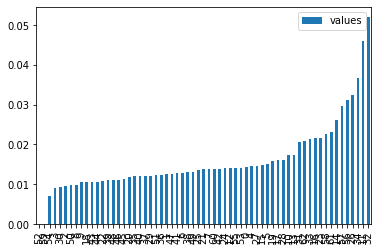

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100, 200))
feature_imp.sort_values(by='values', ascending=True).plot(kind='bar')

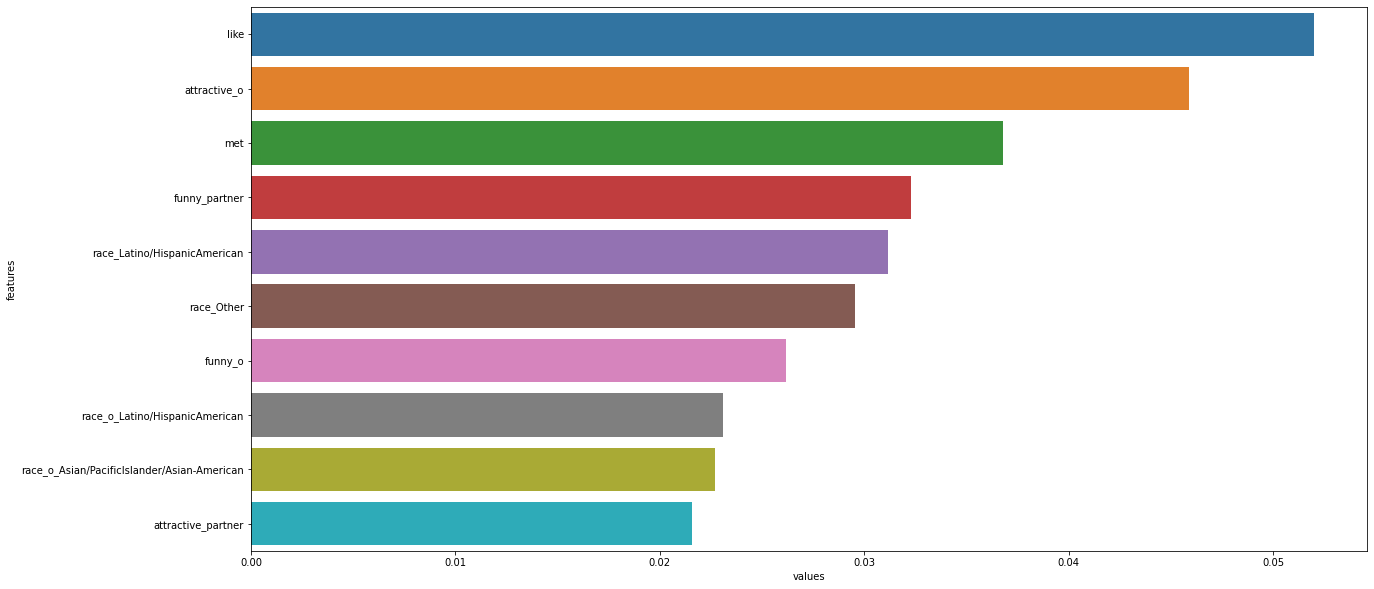

In [62]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.barplot(x='values', y='features',
            data=feature_imp.sort_values(by='values', ascending=False).head(10))